In [21]:
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers, callbacks
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [22]:
df = pd.read_csv('Data_removed_outlier_iqr.csv')

In [23]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,35280,717.703,264.995250,170.035245,1.558472,0.766994,35772,211.943132,0.703616,0.986246,0.860694,0.799800,0.007511,0.001896,0.639680,0.996923,DERMASON
1,83296,1142.638,446.765889,239.013317,1.869209,0.844861,84270,325.662035,0.702588,0.988442,0.801709,0.728932,0.005364,0.000934,0.531342,0.993190,CALI
2,35594,689.634,254.572928,178.441837,1.426644,0.713214,35966,212.884213,0.811629,0.989657,0.940479,0.836241,0.007152,0.002157,0.699298,0.997650,DERMASON
3,52710,872.700,326.039383,207.399450,1.572036,0.771592,53280,259.060720,0.677419,0.989302,0.869707,0.794569,0.006186,0.001521,0.631340,0.992488,SIRA
4,62855,1004.759,413.879306,194.299306,2.130112,0.882954,63781,282.894807,0.598340,0.985482,0.782395,0.683520,0.006585,0.000887,0.467200,0.995188,HOROZ
5,36112,723.077,225.328776,204.666339,1.100957,0.418317,36709,214.427672,0.792243,0.983737,0.867945,0.951621,0.006240,0.003156,0.905583,0.997008,SEKER
6,59442,975.979,402.887444,190.149460,2.118794,0.881616,60289,275.107079,0.732468,0.985951,0.784192,0.682839,0.006778,0.000909,0.466268,0.987927,HOROZ
7,58931,957.164,388.354344,194.043039,2.001383,0.866225,59526,273.922032,0.822714,0.990004,0.808316,0.705340,0.006590,0.001006,0.497505,0.995698,HOROZ
8,34010,681.989,257.829640,168.646392,1.528818,0.756408,34410,208.093433,0.713147,0.988375,0.918886,0.807097,0.007581,0.001984,0.651405,0.995880,DERMASON
9,27280,603.203,223.021086,156.155434,1.428199,0.713964,27550,186.370531,0.760418,0.990200,0.942166,0.835663,0.008175,0.002459,0.698333,0.997359,DERMASON


In [24]:
net = tf.keras.Sequential(
    [
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(7)
    ]
)

In [25]:
X = df.drop(columns=["Class"]).values
y = df.Class.astype("category").cat.codes.values

In [26]:
X, y = SMOTE().fit_resample(X, y)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25
)

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [29]:
net.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        metrics.SparseCategoricalAccuracy()
    ]
)

In [31]:
history = net.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=20, 
    callbacks=[
        callbacks.ModelCheckpoint('models/best_model', save_best_only=True),
    ]
)

Epoch 1/20
437/437 [==============================] - 2s 5ms/step - loss: 0.2740 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9351
Epoch 2/20
437/437 [==============================] - 2s 5ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.1552 - val_sparse_categorical_accuracy: 0.9433
Epoch 3/20
437/437 [==============================] - 2s 5ms/step - loss: 0.1504 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.1475 - val_sparse_categorical_accuracy: 0.9465
Epoch 4/20
437/437 [==============================] - 2s 5ms/step - loss: 0.1447 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.1440 - val_sparse_categorical_accuracy: 0.9482
Epoch 5/20
437/437 [==============================] - 2s 5ms/step - loss: 0.1409 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.1420 - val_sparse_categorical_accuracy: 0.9482
Epoch 6/20
437/437 [==============================] - 2s 5ms/step - loss: 0.1381 - sparse_categorica

In [32]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)

In [33]:
net.evaluate(test_ds)

388/388 [==============================] - 1s 2ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9502


[0.1454799324274063, 0.9502094984054565]

In [34]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)

In [35]:
cf = confusion_matrix(y_test, preds)

classes = df.Class.astype("category").cat.categories.tolist()
class2idx = {}
for idx, c in enumerate(classes):
    class2idx[c] = idx

print(f"Class Interpretation: {class2idx} \n")
print(classification_report(y_test, preds))

Class Interpretation: {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6} 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       881
           1       1.00      1.00      1.00       883
           2       0.96      0.97      0.96       875
           3       0.92      0.91      0.91       910
           4       0.97      0.96      0.96       848
           5       0.97      0.97      0.97       887
           6       0.87      0.90      0.89       922

    accuracy                           0.95      6206
   macro avg       0.95      0.95      0.95      6206
weighted avg       0.95      0.95      0.95      6206



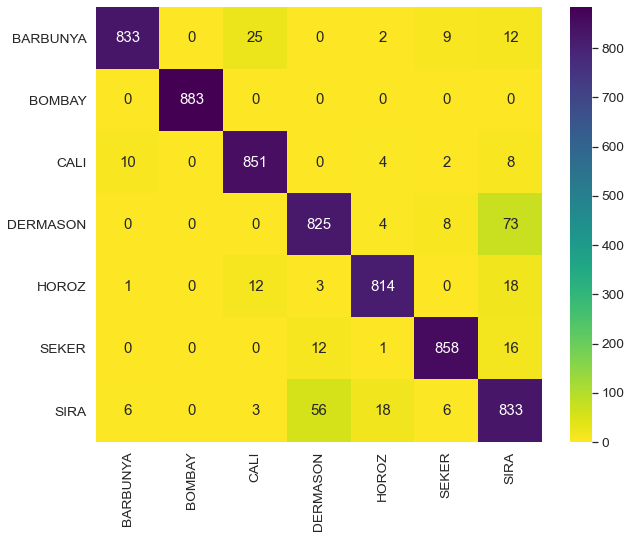

In [50]:
classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
_ = sns.heatmap(cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d", cmap="viridis_r")